# London Bike Sharing Prediction

### Metadata:

- <b> "timestamp" </b> - timestamp field for grouping the data
- <b> "cnt" </b> - the count of a new bike shares
- <b> "t1" </b> - real temperature in C
- <b> "t2" </b> - temperature in C "feels like"
- <b> "hum" </b> - humidity in percentage
- <b> "windspeed" </b> - wind speed in km/h
- <b> "weathercode" </b> - category of the weather
- <b> "isholiday" </b> - boolean field - 1 holiday / 0 non holiday
- <b> "isweekend" </b> - boolean field - 1 if the day is weekend
- <b> "season" </b> - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

- <b> "weathe_code" category description: </b>
    1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog
    
    
### Outline:

- <b> Observe Dataset </b>
- <b> Exploratory Data Analysis </b>
    - Missing values
    - Univariate analysis (Target Attribute)
    - Univariate analysis (Independent Attributes)
    - Multivariate analysis (Categorical & Numerical)
    - Feature Engineering
    
- <b> Dataset Preparation </b>
    - Scaling dataset
- <b> Modeling and Evaluation Metrics </b>
    - Linear Regression
    - XGBBoostRegressor
    - Lasso Regressor


In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Observe Dataset

In [435]:
df = pd.read_csv('london_merged.csv')

In [436]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Our target attribute is <b> cnt </b> number of bikes count in a given hour. 

In [438]:
df["Id"] = df.index + 1

In [439]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Id
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,8707.500000
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,5027.133129
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4354.250000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,8707.500000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,13060.750000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,17414.000000


In [440]:
xdf = df.copy()

# Exploratory Data Analysis

## Missing Values

Before deeply analysing our data, let's check the missing values on our dataset.

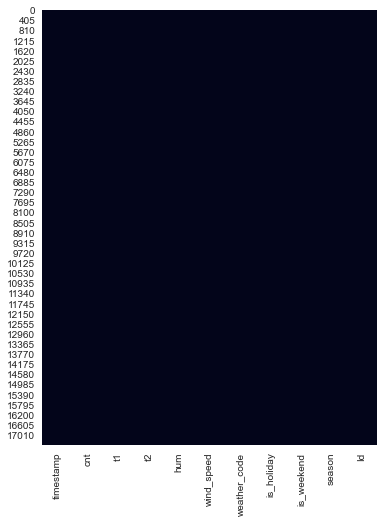

In [441]:
# Let's visualize it

plt.figure(figsize = (6,8))
sns.heatmap(xdf.isnull(), cbar = False);

We don't have any missing values. Perfect

## Univariate Analysis (Target Attribute)

In [442]:
df['cnt'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

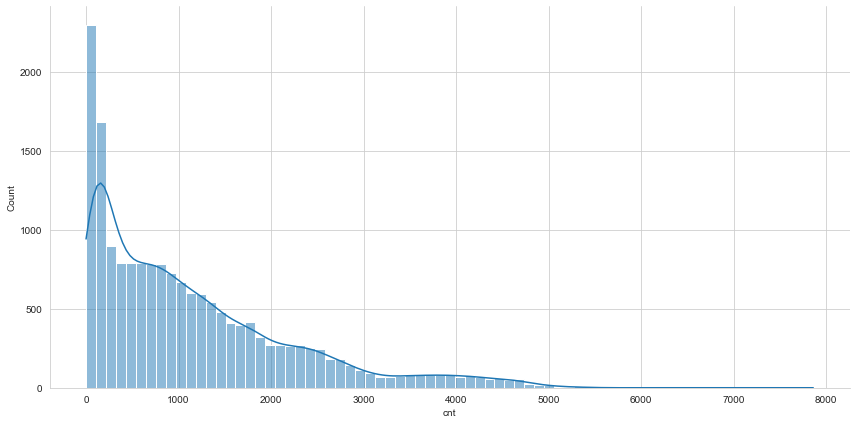

In [443]:
# Let's check it's distriubtion

sns.displot(x = 'cnt', data = xdf, aspect = 2, height = 6, kde = True);

Let's see the number of outliers present in our target attribute. It's postively skewed, we don't want to touch the prediction data. So leaving it as it is.

In [444]:
xdf

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Id
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,3
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,4
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,17410
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,17411
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,17412
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,17413


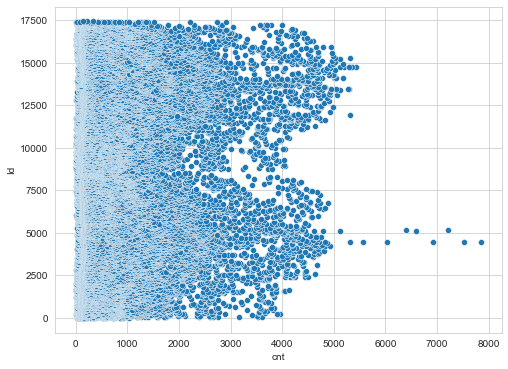

In [445]:
# Scatterplot

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'cnt', y = "Id", data = xdf);

As we can see, there are some amount of outliers. Let's confirm this on <b> Boxplot </b>

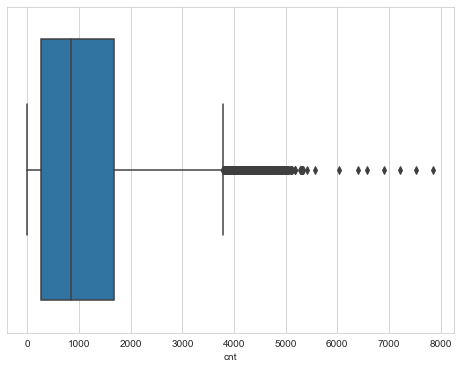

In [446]:
# Boxplot

plt.figure(figsize = (8,6))
sns.boxplot(x = "cnt", data = xdf);

In [447]:
xdf['cnt'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

In [448]:
xdf.shape

(17414, 11)

In [449]:
## Let's normally distribute the data

## function reducing +ve skewness using Sqrt 

def sqrt_transformation(dataframe):
  return np.sqrt(dataframe)


# function for removing outliers

def remove_outliers(dataframe, column):
  q3 = dataframe[column].quantile(0.75)
  q1 = dataframe[column].quantile(0.25)
  IQR = q3 - q1
  
  upper = q3 + (1.5 * IQR)
  lower = q1 - (1.5 * IQR)
  
  dataframe = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

  return dataframe



In [450]:
# Remove outliers on 'Target Attribute'

xdf = remove_outliers(xdf,'cnt')

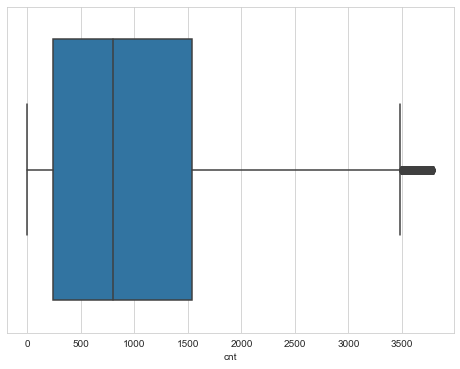

In [451]:

# boxplot
plt.figure(figsize = (8,6))
sns.boxplot(x = "cnt", data = xdf);


In [452]:
# describe
xdf['cnt'].describe()

count    16739.000000
mean      1014.344107
std        888.307874
min          0.000000
25%        236.000000
50%        798.000000
75%       1536.000000
max       3793.000000
Name: cnt, dtype: float64

## Univariate Analysis (Independent Variables)

In [453]:
xdf.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season', 'Id'],
      dtype='object')

In [454]:
# Selecting on numerical features from dataset

numerical_df = xdf.select_dtypes(exclude='object')

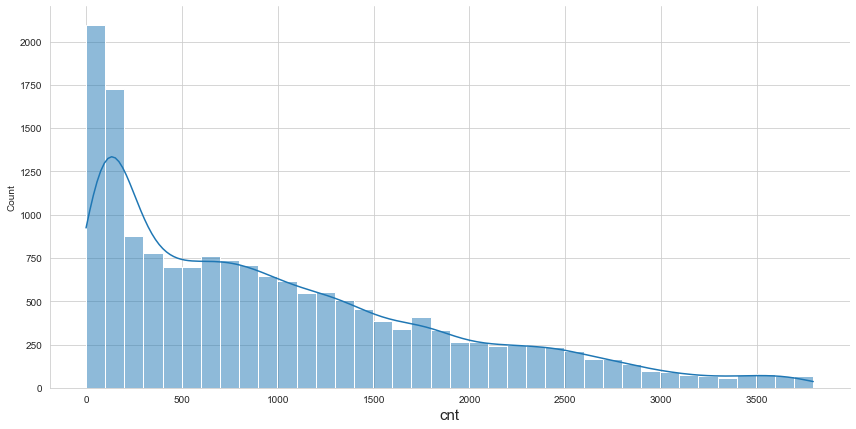

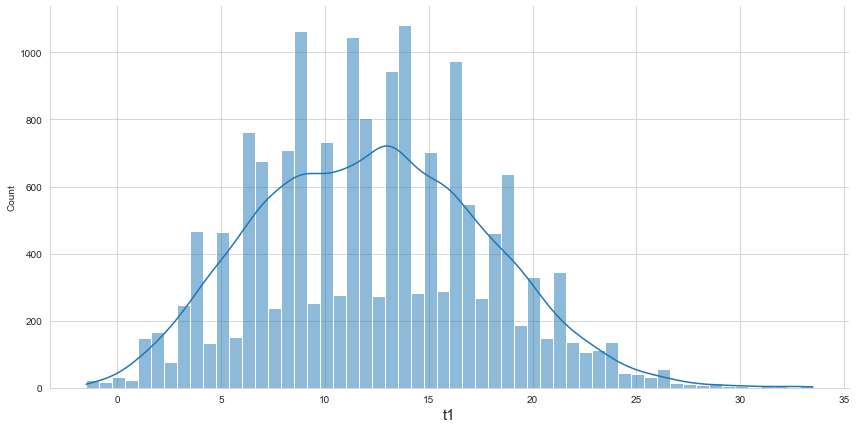

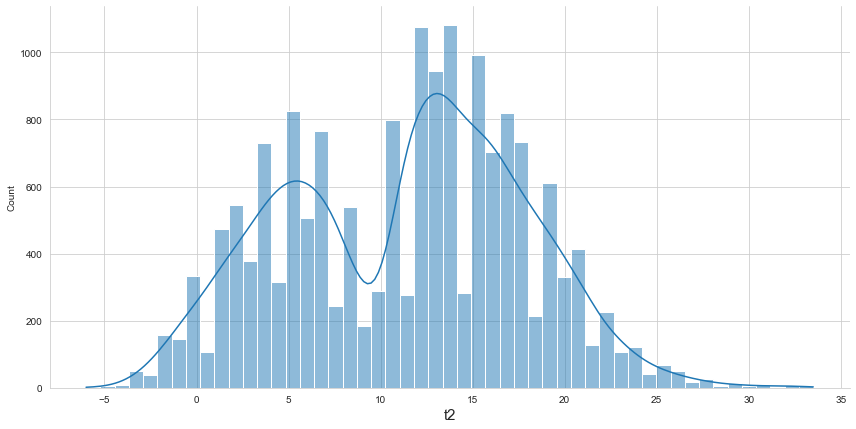

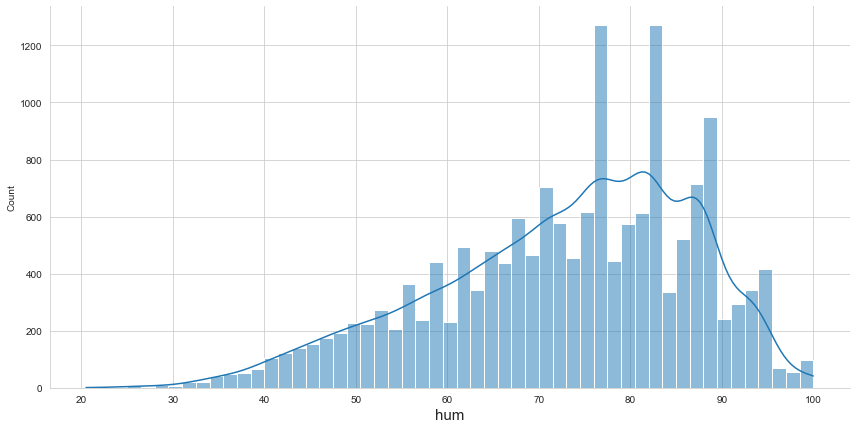

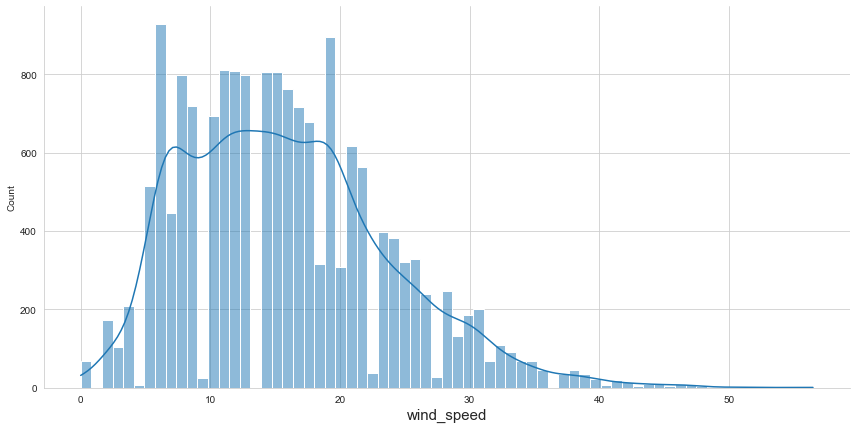

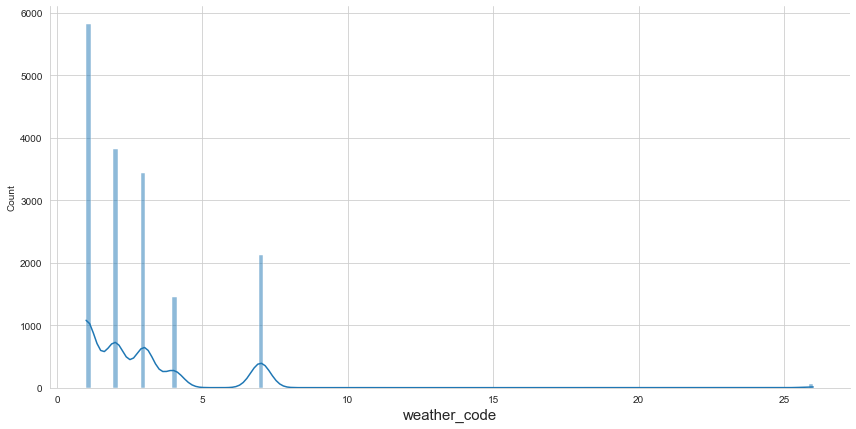

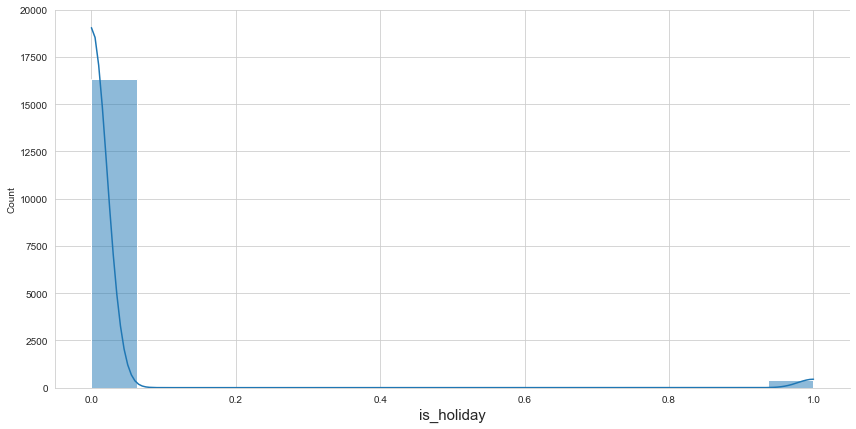

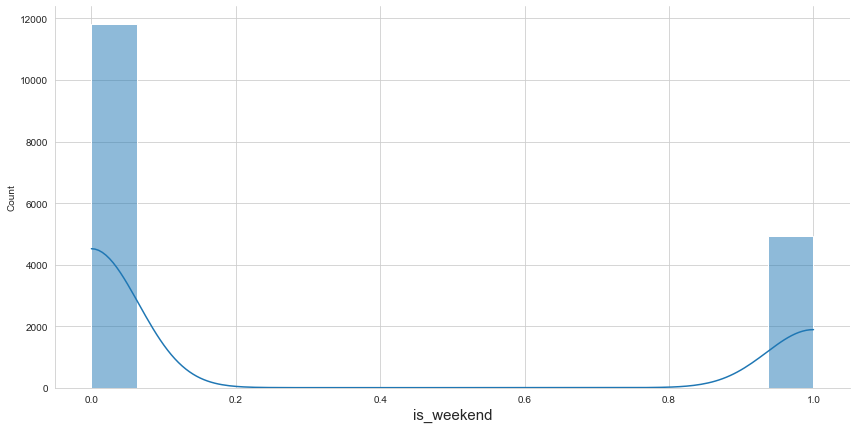

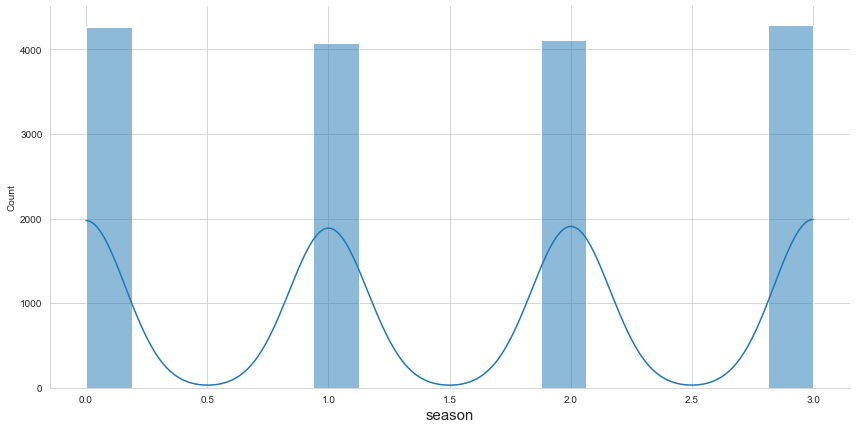

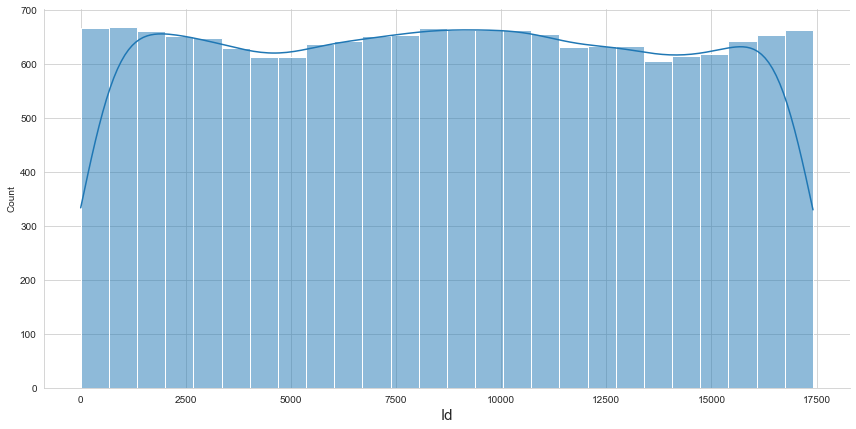

In [455]:
# Visualizing all the numerical feautures

for i in numerical_df:
  sns.displot(x = i, data = xdf, height = 6, aspect = 2, kde = True);
  plt.xlabel(i, fontsize = 15)

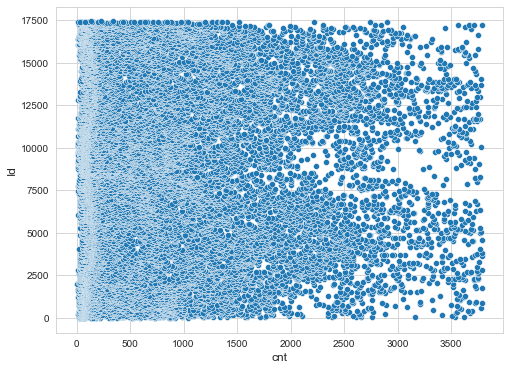

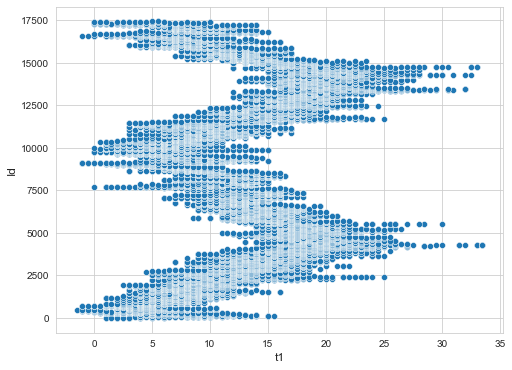

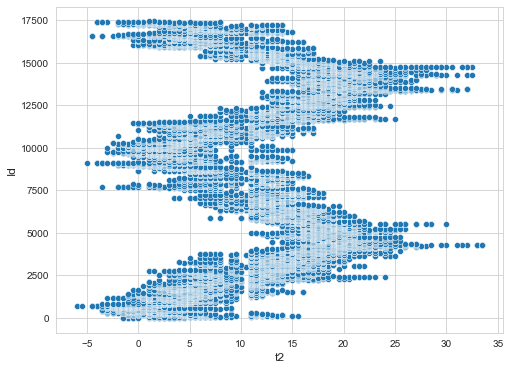

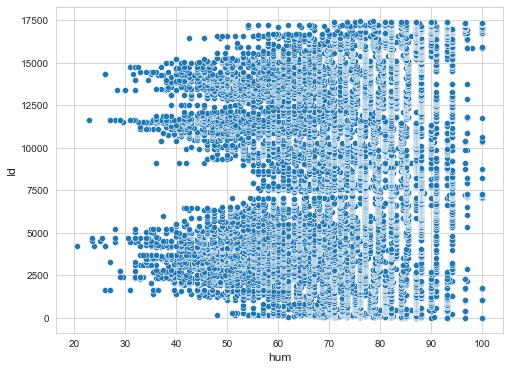

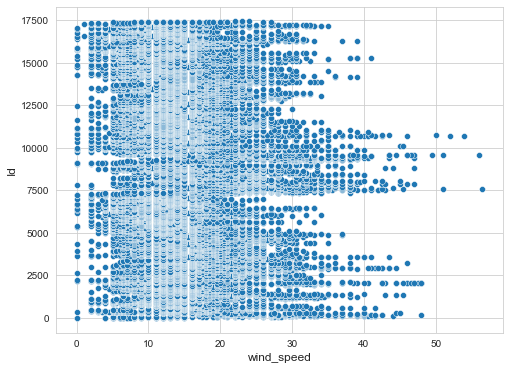

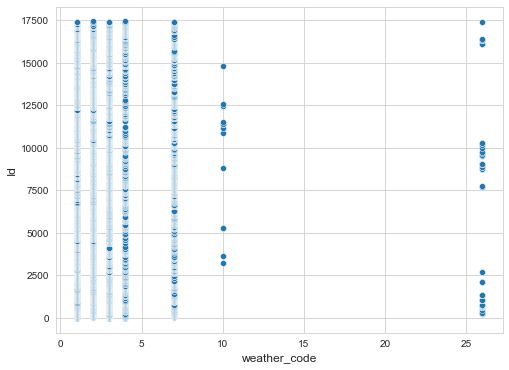

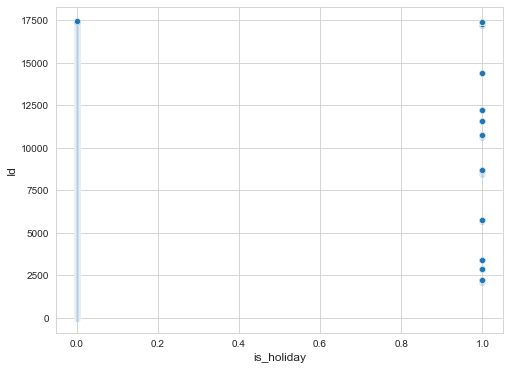

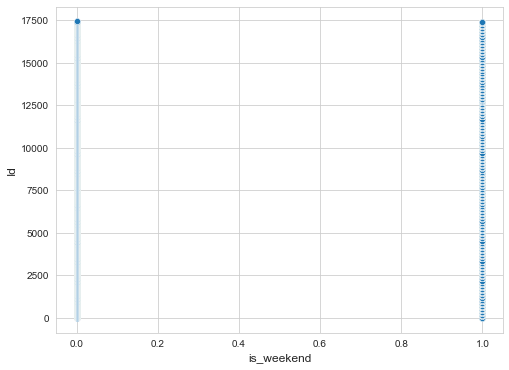

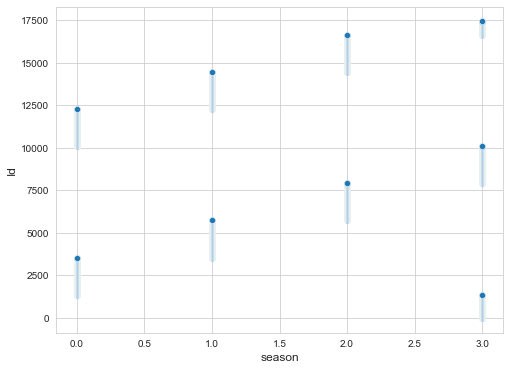

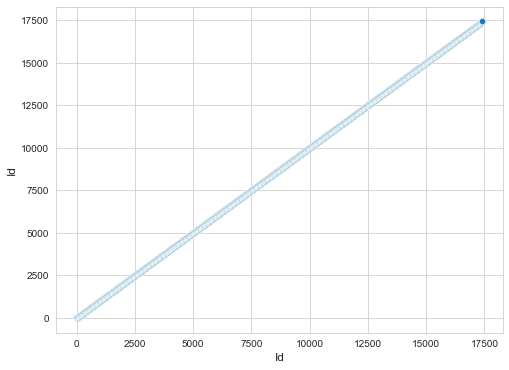

In [456]:
# Let's check their scatterplots

for i in numerical_df:
  plt.figure(figsize = (8,6))
  sns.scatterplot(x = i, y = "Id", data = xdf);
  plt.xlabel(i, fontsize = 12)
  plt.ylabel("Id", fontsize = 12)

We can observe, some sort outliers below q1 on <b> hum <b> and outliers above q3 on <b> wind speed </b>. Let's confirm it on boxplot.

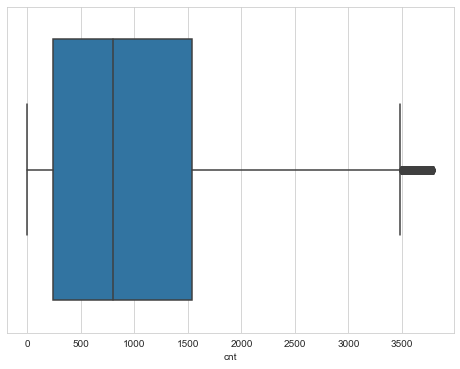

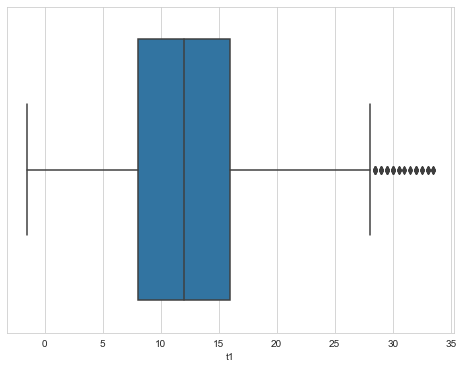

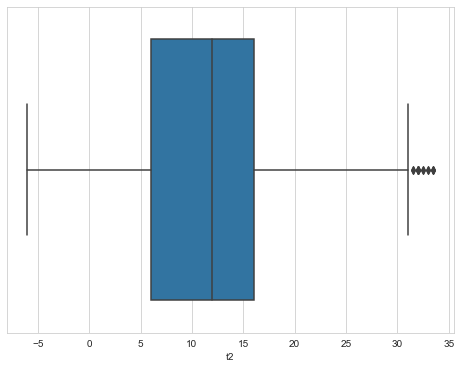

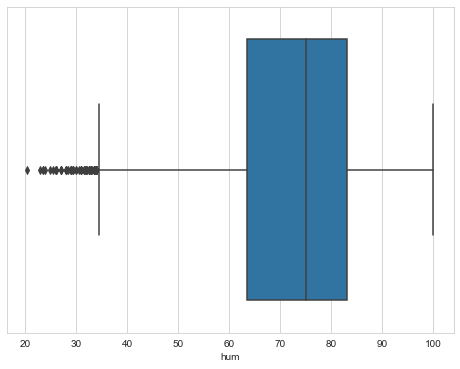

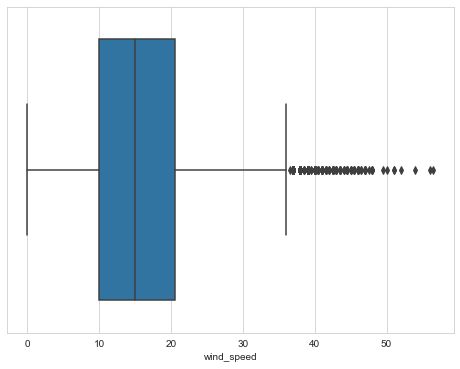

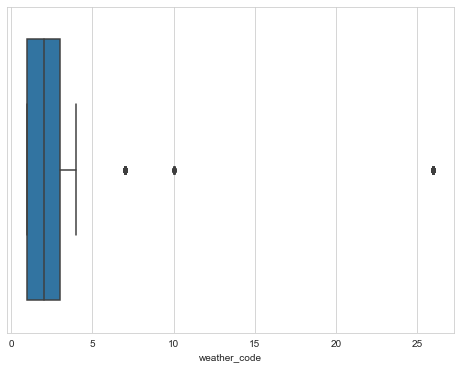

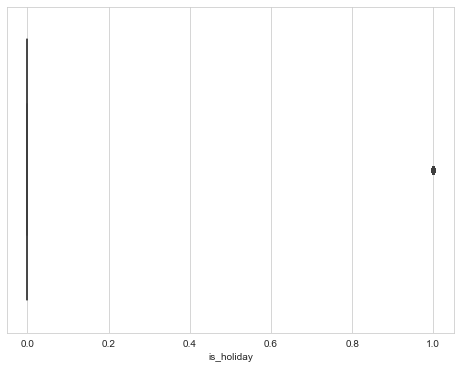

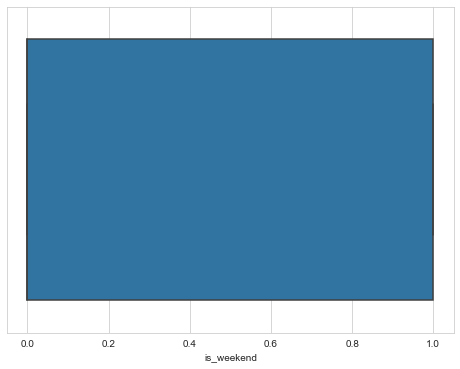

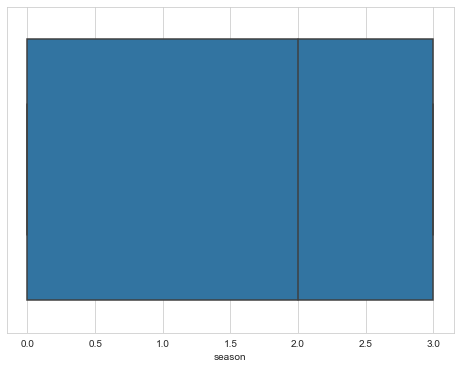

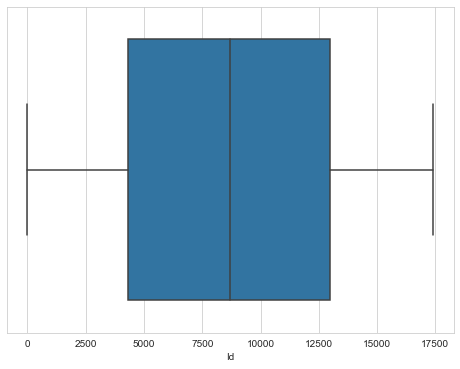

In [457]:
# Boxplot

for i in numerical_df:
  plt.figure(figsize = (8,6))
  sns.boxplot(x = i, data = xdf);

<b> Observations </b>
- t1 , t2 has some outliers
- hum is negatively skewed and has outliers below q1
- wind_speed has also some outliers.
- whereas, weather_code is actually a categorical variable, we won't be fixing it.

In [458]:
## Let's remove outliers from 'hum'

xdf = remove_outliers(xdf, 'hum')

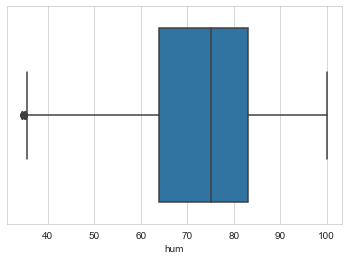

In [459]:
# after removoing 'hum' outlier

sns.boxplot(x = 'hum', data = xdf);

## Muttivariate Analysis


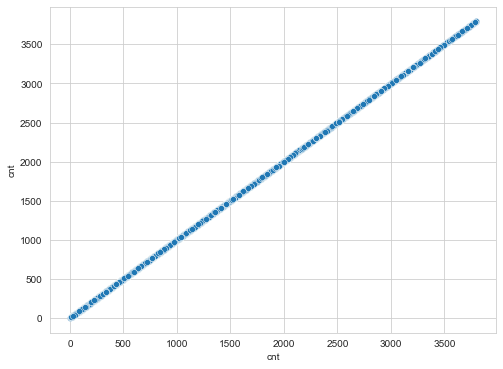

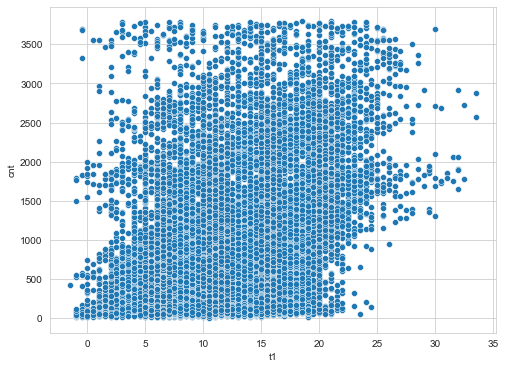

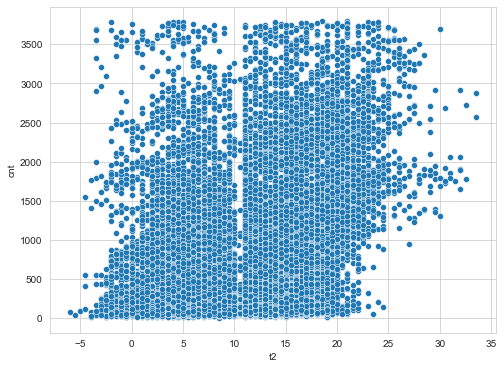

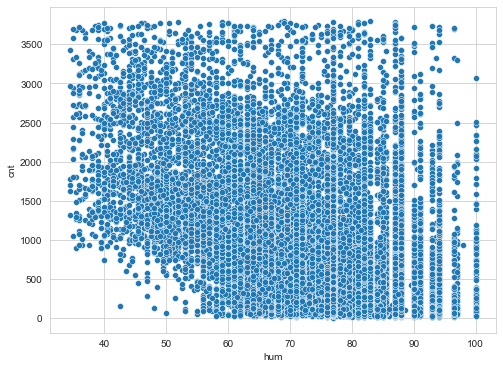

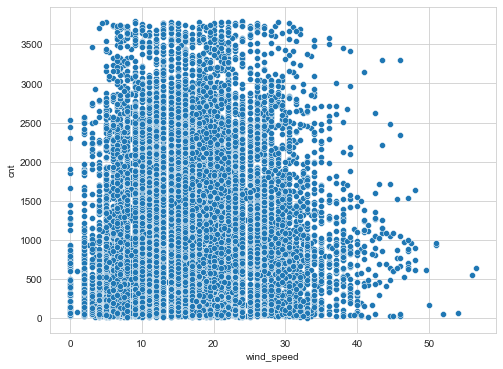

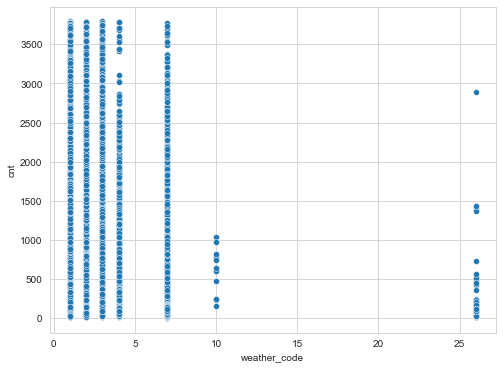

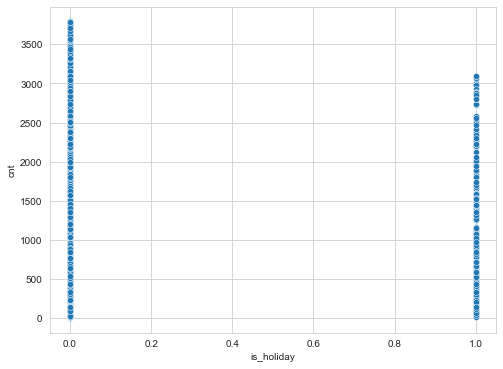

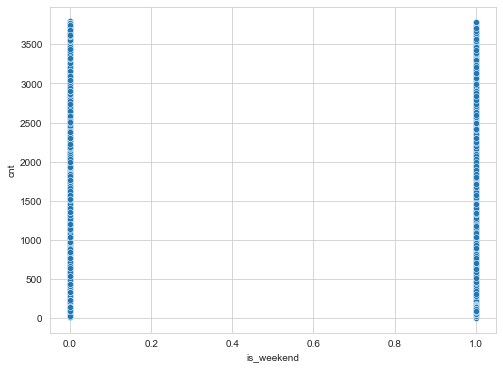

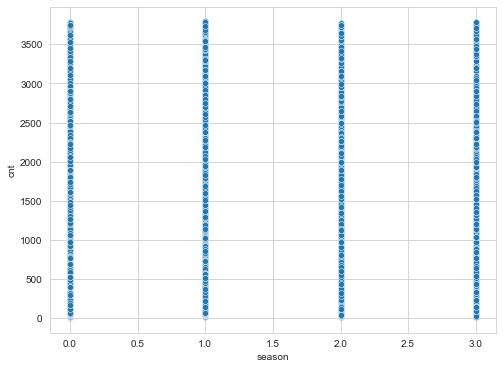

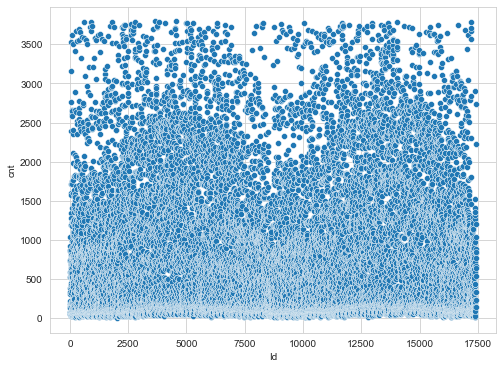

In [460]:
# Let's see their relation with target attribute

for i in numerical_df:
  plt.figure(figsize = (8,6))
  sns.scatterplot(x = i, y = 'cnt', data = xdf);

## Categorical

In [461]:
xdf['weather_code'].value_counts()

1.0     5727
2.0     3826
3.0     3436
7.0     2129
4.0     1455
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [462]:
categorical_df = ['weather_code']

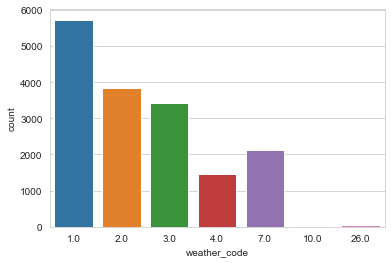

In [463]:
for i in categorical_df:
  sns.countplot(x = i, data = xdf);

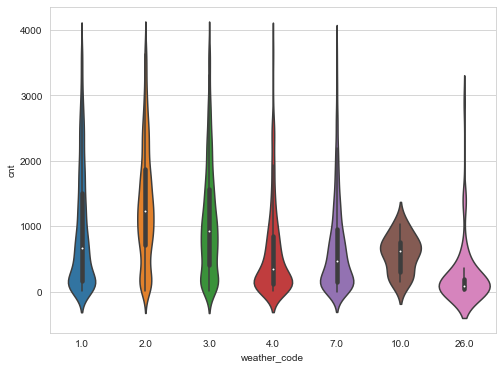

In [464]:
## with taget variable

plt.figure(figsize = (8,6))
sns.violinplot(y = 'cnt', x = 'weather_code', data = xdf);

<b> Observations </b>
- Weather code 1 has more number of cycles are shared overall.
- So, does Weather 2 but little less than Weather 1.
- Weather 3 is around, 0 - 50K
- However, Weather 10.0 and Weather 26.0 is highly populated around 0-16K. I think they are regular cyclist on any condition, they ride a bike.

## Feature Engineering

Let's extract the date.

In [465]:
# convert date (object) into datetime

xdf['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y%m%d %H:%M:%S')

In [466]:
xdf['timestamp']

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 16647, dtype: datetime64[ns]

In [467]:
# Seperating all the year, month and hour and visualize them

xdf['year'] = xdf['timestamp'].dt.year
xdf['month'] = xdf['timestamp'].dt.month
xdf['hour'] = xdf['timestamp'].dt.hour

<b> Month

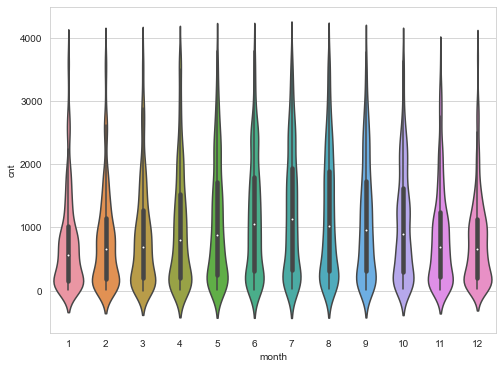

In [468]:
# Let's see which month is the popular for cycle sharing.

plt.figure(figsize = (8,6))
sns.violinplot(x = xdf['month'] , y = 'cnt', data = xdf);

We can see <b> July </b> and <b> August </b> tend to have more number of cycles shared. People in London only use bicycle on the warmest month, we can compare our visulization with this image.

 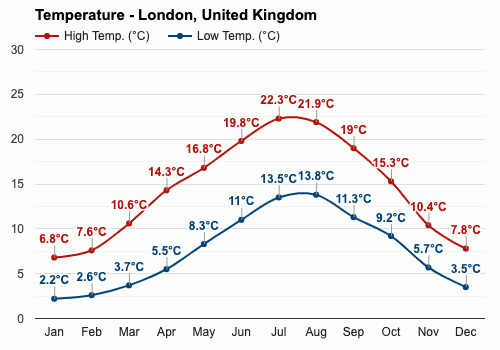

<b> Year

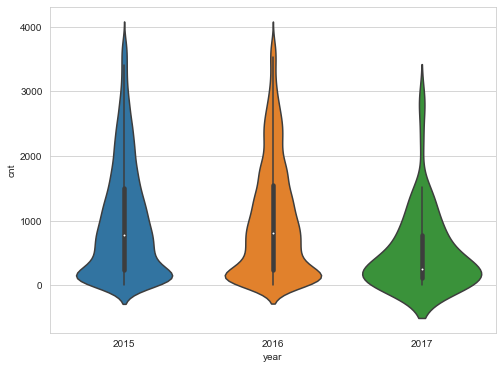

In [469]:
## Let's look at the year

plt.figure(figsize = (8,6))
sns.violinplot(x = xdf['year'] , y = 'cnt', data = xdf);

The density of a Cycling has dropped over the years.

<b> Hour

Text(0.5, 0, 'Hour')

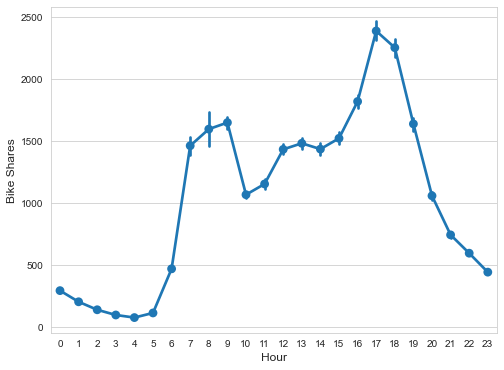

In [470]:
## Let's visualize in respect to an hour

plt.figure(figsize = (8,6))
sns.pointplot(x = xdf['hour'] , y = 'cnt', data = xdf);
plt.ylabel("Bike Shares", fontsize = 12)
plt.xlabel("Hour", fontsize = 12)

As always, peak hours are the busiest.

In [471]:
xdf

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Id,year,month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,2015,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2,2015,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,3,2015,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,4,2015,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,5,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,17410,2017,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,17411,2017,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,17412,2017,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,17413,2017,1,22


In [472]:
xdf.drop(['timestamp','Id'], axis = 1, inplace = True)

## Preparing Dataset

In [473]:
X = xdf.drop('cnt', axis = 1)
y = xdf['cnt']

### Scaling Dataset

In [474]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)

In [475]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14982, 11), (1665, 11), (14982,), (1665,))

# Modeling and Evaluation Metrics

In [476]:
model_score = pd.DataFrame(columns = ("R2_Score","RMSE","MAE"))

### Linear Regression

In [477]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, mean_squared_error, make_scorer

In [478]:

lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [479]:
lr.score(X_test, y_test)

0.31957410814969256

In [480]:
preds = lr.predict(X_test)

In [481]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

RMSE: 738.843280
MAE: 545.608721


In [482]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = 1 - (np.sum((y_test - preds) ** 2)  / np.sum((y_test - y_test.mean()) ** 2))
print("R2:", r2)

R2: 0.31957410814969256


In [483]:
model_score = model_score.append(pd.DataFrame({"R2_Score":[r2],
                                               "RMSE":[rmse],
                                              "MAE":[mae]}, index = ['LinearRegression']))

In [484]:
actual = pd.DataFrame(data = y_test.values, columns = ["actual"])
predicted = pd.DataFrame(data = preds, columns = ["predicted"])

final = pd.concat([actual, predicted], axis = 1)
final

,actual,predicted
0,542,349.931618
1,78,192.530411
2,520,-11.832796
3,671,1240.907814
4,146,206.526795
...,...,...
1660,1039,357.256625
1661,2036,288.514745
1662,1007,1038.089996
1663,659,1421.499362


### XGB Regressor

In [485]:
from xgboost.sklearn import XGBRegressor

In [486]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train, y_train)

preds = xgbmodel.predict(X_test)

In [487]:
print("Score", xgbmodel.score(X_test, y_test))

Score 0.9522432593619701


In [488]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

RMSE: 195.739850
MAE: 123.243378


In [489]:
r2 = 1 - (np.sum((y_test - preds) ** 2)  / np.sum((y_test - y_test.mean()) ** 2))
print("R2:", r2)

R2: 0.9522432593619701


In [490]:
model_score = model_score.append(pd.DataFrame({"R2_Score":[r2],
                                               "RMSE":[rmse],
                                              "MAE":[mae]}, index = ['XGBoostRegressor']))

In [491]:
actual = pd.DataFrame(data = y_test.values, columns = ["actual"])
predicted = pd.DataFrame(data = preds, columns = ["predicted"])

final = pd.concat([actual, predicted], axis = 1)
final

,actual,predicted
0,542,534.753967
1,78,58.371952
2,520,483.426636
3,671,639.503967
4,146,137.854538
...,...,...
1660,1039,1086.486572
1661,2036,2044.747070
1662,1007,1247.895264
1663,659,717.458435


In [492]:
y_test.values

array([ 542,   78,  520, ..., 1007,  659,  335], dtype=int64)

### Lasso Regressor

In [493]:
from sklearn.linear_model import Lasso

In [494]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train, y_train)

Lasso(alpha=0.01)

In [495]:
preds = ls.predict(X_test)

In [496]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

RMSE: 738.838713
MAE: 545.604292


In [497]:
r2 = 1 - (np.sum((y_test - preds) ** 2)  / np.sum((y_test - y_test.mean()) ** 2))
print("R2:", r2)

R2: 0.3195825209895573


In [498]:
model_score = model_score.append(pd.DataFrame({"R2_Score":[r2],
                                               "RMSE":[rmse],
                                              "MAE":[mae]}, index = ['LassoRegressor']))

In [499]:
actual = pd.DataFrame(data = y_test.values, columns = ["actual"])
predicted = pd.DataFrame(data = preds, columns = ["predicted"])

final = pd.concat([actual, predicted], axis = 1)
final

,actual,predicted
0,542,350.089948
1,78,192.443788
2,520,-11.458532
3,671,1240.894345
4,146,206.576568
...,...,...
1660,1039,357.311508
1661,2036,288.419968
1662,1007,1037.963375
1663,659,1421.329836


## The result

In [500]:
model_score

,R2_Score,RMSE,MAE
LinearRegression,0.319574,738.843280,545.608721
XGBoostRegressor,0.952243,195.739850,123.243378
LassoRegressor,0.319583,738.838713,545.604292
